<a href="https://colab.research.google.com/github/Sajish06/MachineLearning/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
print("ready:", pd.__version__)

ready: 2.2.2


In [6]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
print("shape:", df.shape)
print(df.info())
display(df.describe().T)

missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

shape: (545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


,0


In [8]:
target = "price"

X = df.drop(columns=[target])
y = df[target].copy()

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("numerical:", num_cols)
print("categorical:", cat_cols)

num_transformer = Pipeline([
    ('imputer',
     __import__('sklearn.impute').impute.SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', __import__('sklearn.impute').impute.SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


numerical: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("train:", X_train.shape, "test:", X_test.shape)

train: (436, 12) test: (109, 12)


In [11]:
feature = 'area'
X_train_feat = X_train[[feature]].copy()
X_test_feat  = X_test[[feature]].copy()

simple_model = Pipeline([
    ('imputer', __import__('sklearn.impute').impute.SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

simple_model.fit(X_train_feat, y_train)
y_pred_simple = simple_model.predict(X_test_feat)

print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("MSE:", mean_squared_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("R2:", r2_score(y_test, y_pred_simple))

MAE: 1474748.1337969352
MSE: 3675286604768.1855
RMSE: 1917103.7021424235
R2: 0.27287851871974633


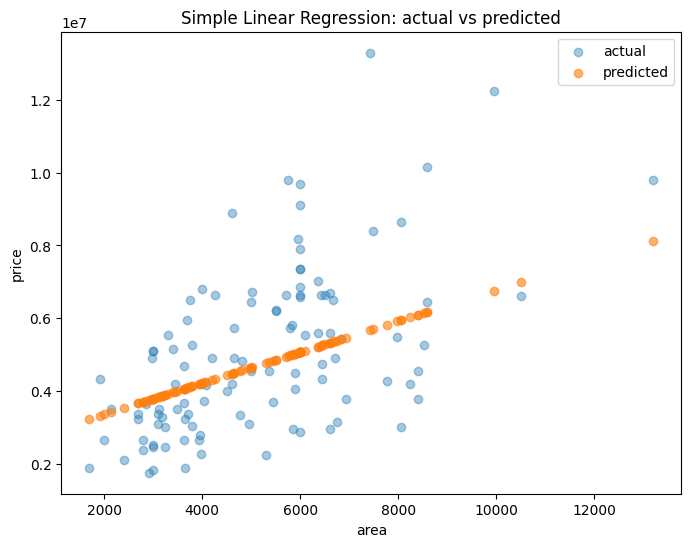

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_feat, y_test, alpha=0.4, label='actual')
plt.scatter(X_test_feat, y_pred_simple, alpha=0.6, label='predicted')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()
plt.title("Simple Linear Regression: actual vs predicted")
plt.show()

In [14]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))
print("R2:", r2_score(y_test, y_pred))

MAE: 970043.4039201644
MSE: 1754318687330.6682
RMSE: 1917103.7021424235
R2: 0.6529242642153175


In [15]:
def get_feature_names(column_transformer):
    feature_names = []
    for name, trans, cols in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(trans, 'named_steps') and 'onehot' in trans.named_steps:
            o = trans.named_steps['onehot']
            cats = o.categories_
            for i, c in enumerate(cols):
                for cat in cats[i]:
                    feature_names.append(f"{c}__{cat}")
        elif hasattr(trans, 'named_steps') and 'scaler' in trans.named_steps:
            for c in cols:
                feature_names.append(c)
        else:
            for c in cols:
                feature_names.append(c)
    return feature_names

feat_names = get_feature_names(model.named_steps['preprocessor'])
coefs = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature': feat_names, 'coefficient': coefs})
display(coef_df.sort_values(by='coefficient', key=abs, ascending=False).head(20))


,feature,coefficient
2,bathrooms,521879.027748
0,area,519552.416340
14,airconditioning__yes,395713.367922
13,airconditioning__no,-395713.367922
3,stories,349251.438906
11,hotwaterheating__no,-342324.942669
12,hotwaterheating__yes,342324.942669
16,prefarea__yes,314945.282657
15,prefarea__no,-314945.282657
19,furnishingstatus__unfurnished,-233469.435624


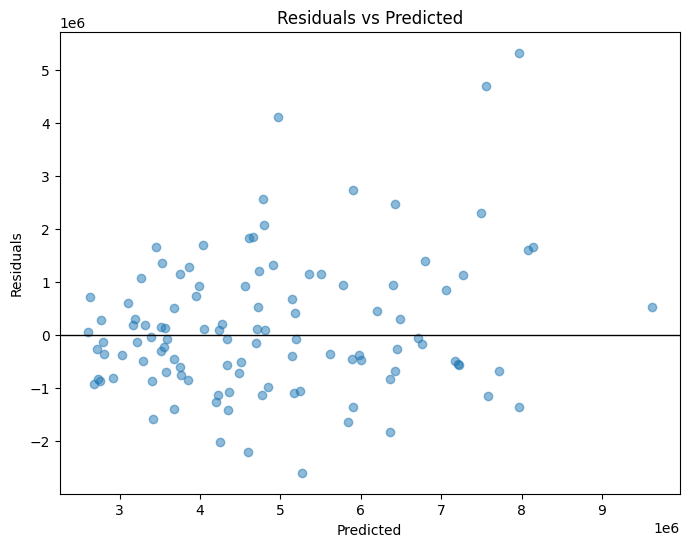

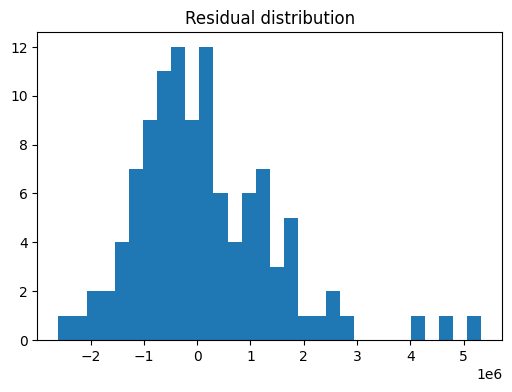

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residual distribution")
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_num = X[num_cols].copy()
X_num = X_num.fillna(X_num.median())
X_num_scaled = StandardScaler().fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=num_cols)

vif_data = pd.DataFrame()
vif_data["feature"] = X_num_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_num_scaled.values, i)
                   for i in range(X_num_scaled.shape[1])]
display(vif_data.sort_values("VIF", ascending=False))

,feature,VIF
1,bedrooms,1.316597
3,stories,1.255202
2,bathrooms,1.252775
0,area,1.170959
4,parking,1.164172
